In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score,confusion_matrix, classification_report
from sklearn.utils import resample

In [2]:
df = pd.read_excel("insulin information.xlsx")
df.head()

,Store Name,Address,GST Number,Contact Information,Store Pincode,Brand Name,Insulin Name,Insulin Type,Dosage Strength,Packaging Type,Form,Packaging Size,Expiry Date,Price (INR),Distributor Name,Quantity available,Daily Stock Update
0,NEW GALAXY MEDICAL AND GENERAL STORE,"GALAXY HEIGHT CO OP, WING-D SHOP NO.27 HSG, SO...",27BAZPD5529F1ZC,28799330,400104,Human Actrapid,Soluble Insulin Injection I.P.,short-acting,40 IU/mL,Vial,Injection,10 mL,2024-12-01,157,NaN,2,2
1,NEW GALAXY MEDICAL AND GENERAL STORE,"GALAXY HEIGHT CO OP, WING-D SHOP NO.27 HSG, SO...",27BAZPD5529F1ZC,28799330,400104,LUPISULIN N,Insulin Injection Isophane IP,intermediate-acting,40 IU/mL,Vial,Injection,10 mL,2024-12-01,198,LUPIN,3,2
2,NEW GALAXY MEDICAL AND GENERAL STORE,"GALAXY HEIGHT CO OP, WING-D SHOP NO.27 HSG, SO...",27BAZPD5529F1ZC,28799330,400104,NovoRapid,Insulin aspart IP,fast-acting,100 IU/mL,Box,Injection,3 mL,2025-04-01,600,Novo Nordisk,1,1
3,NEW GALAXY MEDICAL AND GENERAL STORE,"GALAXY HEIGHT CO OP, WING-D SHOP NO.27 HSG, SO...",27BAZPD5529F1ZC,28799330,400104,NovoRapid,Insulin aspart IP,fast-acting,100 IU/mL,Box,Injection,10 mL,2025-01-01,2000,Novo Nordisk,1,1
4,NEW GALAXY MEDICAL AND GENERAL STORE,"GALAXY HEIGHT CO OP, WING-D SHOP NO.27 HSG, SO...",27BAZPD5529F1ZC,28799330,400104,Ryzodeg,Insulin Degludec Insulin Aspart,rapid-acting,100 IU/mL,Box,Injection,3 mL,2025-12-01,1500,Novo Nordisk India Pvt Ltd,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Store Name           196 non-null    object        
 1   Address              196 non-null    object        
 2   GST Number           196 non-null    object        
 3   Contact Information  196 non-null    int64         
 4   Store Pincode        196 non-null    int64         
 5   Brand Name           196 non-null    object        
 6   Insulin Name         196 non-null    object        
 7   Insulin Type         196 non-null    object        
 8   Dosage Strength      196 non-null    object        
 9   Packaging Type       196 non-null    object        
 10  Form                 196 non-null    object        
 11  Packaging Size       196 non-null    object        
 12  Expiry Date          196 non-null    datetime64[ns]
 13  Price (INR)          196 non-null  

In [4]:
df.describe()

,Contact Information,Store Pincode,Price (INR),Quantity available,Daily Stock Update
count,1.960000e+02,196.000000,196.000000,196.000000,196.000000
mean,6.399673e+09,400066.744898,638.464286,1.897959,1.382653
std,4.360695e+09,30.881182,519.526810,1.185293,0.811144
min,2.412156e+07,400014.000000,120.000000,1.000000,1.000000
25%,2.890477e+07,400047.000000,178.000000,1.000000,1.000000
50%,9.167616e+09,400064.000000,480.000000,2.000000,1.000000
75%,9.867321e+09,400104.000000,1000.000000,2.000000,2.000000
max,9.967910e+09,400104.000000,2200.000000,7.000000,6.000000


In [5]:
df.isnull().sum()

Store Name              0
Address                 0
GST Number              0
Contact Information     0
Store Pincode           0
Brand Name              0
Insulin Name            0
Insulin Type            0
Dosage Strength         0
Packaging Type          0
Form                    0
Packaging Size          0
Expiry Date             0
Price (INR)             0
Distributor Name       29
Quantity available      0
Daily Stock Update      0
dtype: int64

In [6]:
df1=df.copy()

In [7]:
df1.head()

,Store Name,Address,GST Number,Contact Information,Store Pincode,Brand Name,Insulin Name,Insulin Type,Dosage Strength,Packaging Type,Form,Packaging Size,Expiry Date,Price (INR),Distributor Name,Quantity available,Daily Stock Update
0,NEW GALAXY MEDICAL AND GENERAL STORE,"GALAXY HEIGHT CO OP, WING-D SHOP NO.27 HSG, SO...",27BAZPD5529F1ZC,28799330,400104,Human Actrapid,Soluble Insulin Injection I.P.,short-acting,40 IU/mL,Vial,Injection,10 mL,2024-12-01,157,NaN,2,2
1,NEW GALAXY MEDICAL AND GENERAL STORE,"GALAXY HEIGHT CO OP, WING-D SHOP NO.27 HSG, SO...",27BAZPD5529F1ZC,28799330,400104,LUPISULIN N,Insulin Injection Isophane IP,intermediate-acting,40 IU/mL,Vial,Injection,10 mL,2024-12-01,198,LUPIN,3,2
2,NEW GALAXY MEDICAL AND GENERAL STORE,"GALAXY HEIGHT CO OP, WING-D SHOP NO.27 HSG, SO...",27BAZPD5529F1ZC,28799330,400104,NovoRapid,Insulin aspart IP,fast-acting,100 IU/mL,Box,Injection,3 mL,2025-04-01,600,Novo Nordisk,1,1
3,NEW GALAXY MEDICAL AND GENERAL STORE,"GALAXY HEIGHT CO OP, WING-D SHOP NO.27 HSG, SO...",27BAZPD5529F1ZC,28799330,400104,NovoRapid,Insulin aspart IP,fast-acting,100 IU/mL,Box,Injection,10 mL,2025-01-01,2000,Novo Nordisk,1,1
4,NEW GALAXY MEDICAL AND GENERAL STORE,"GALAXY HEIGHT CO OP, WING-D SHOP NO.27 HSG, SO...",27BAZPD5529F1ZC,28799330,400104,Ryzodeg,Insulin Degludec Insulin Aspart,rapid-acting,100 IU/mL,Box,Injection,3 mL,2025-12-01,1500,Novo Nordisk India Pvt Ltd,1,1


In [8]:
# Data Preprocessing
# Drop 'Distributor Name' column
df.drop(columns=['Distributor Name','Address','GST Number', 'Contact Information','Expiry Date','Packaging Type', 'Form', 'Packaging Size','Daily Stock Update'], inplace=True)

In [9]:
print(df.columns)

Index(['Store Name', 'Store Pincode', 'Brand Name', 'Insulin Name',
       'Insulin Type', 'Dosage Strength', 'Price (INR)', 'Quantity available'],
      dtype='object')


In [10]:
df.head()

,Store Name,Store Pincode,Brand Name,Insulin Name,Insulin Type,Dosage Strength,Price (INR),Quantity available
0,NEW GALAXY MEDICAL AND GENERAL STORE,400104,Human Actrapid,Soluble Insulin Injection I.P.,short-acting,40 IU/mL,157,2
1,NEW GALAXY MEDICAL AND GENERAL STORE,400104,LUPISULIN N,Insulin Injection Isophane IP,intermediate-acting,40 IU/mL,198,3
2,NEW GALAXY MEDICAL AND GENERAL STORE,400104,NovoRapid,Insulin aspart IP,fast-acting,100 IU/mL,600,1
3,NEW GALAXY MEDICAL AND GENERAL STORE,400104,NovoRapid,Insulin aspart IP,fast-acting,100 IU/mL,2000,1
4,NEW GALAXY MEDICAL AND GENERAL STORE,400104,Ryzodeg,Insulin Degludec Insulin Aspart,rapid-acting,100 IU/mL,1500,1


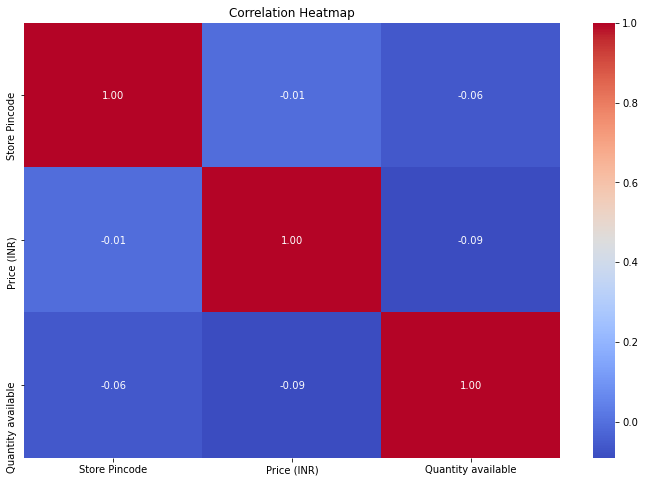

In [11]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [12]:
df1=df.copy()

In [13]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Store Name', 'Brand Name', 'Insulin Name', 'Insulin Type',
       'Dosage Strength'],
      dtype='object')

In [14]:
numerical_columns = df.select_dtypes(exclude=['object']).columns
numerical_columns

Index(['Store Pincode', 'Price (INR)', 'Quantity available'], dtype='object')

In [15]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column].astype(str))  # Convert to string before encoding

# Print the mapping for each categorical column
for column, encoder in label_encoders.items():
    print(f"Encoded values for '{column}':")
    for label, code in zip(encoder.classes_, encoder.transform(encoder.classes_)):
        print(f"{label}: {code}")
    print()

Encoded values for 'Store Name':
ARADHANA MEDICAL: 0
ASHISH MEDICAL & GENERAL STORES: 1
CHEMIST HUB: 2
CHHAYA SHREE MEDICAL & GENERAL STORES: 3
CRESCENT DRUG STORE: 4
DADAR PHARMACY: 5
EVERSHINE MEDICAL AND GENERAL STORES: 6
GANESH DRUG HOUSE: 7
GENMART PHARMACY: 8
GETWELL CHEMIST: 9
GOLDEN CHEMIST: 10
GREEN KAMAL MEDICAL & GENERAL STORE: 11
GREEN LIFE MEDICAL & GENERAL STORES: 12
IDEAL MEDICAL AND GENERAL STORES: 13
KINJAL MEDICAL & GENERAL STORES: 14
LUCKY MEDICAL & GENERAL STORES: 15
MAHARASHTRA MEDICAL STORES: 16
MAHAVIR CHEMIST: 17
MAMTA MEDICAL: 18
MANOJ MEDICAL & GENERAL STORES: 19
MEDIWELL CHEMIST: 20
MEDLINE CHEMIST: 21
MEENA MEDICAL & GENERAL STORE: 22
METRO MEDICAL: 23
MUMBAI CHEMIST & GENERAL STORES: 24
NEW ARADHANA MEDICAL AND GENERAL STORES: 25
NEW DOLLY CHEMIST AND GENERAL STORE: 26
NEW GALAXY MEDICAL AND GENERAL STORE: 27
NEW MATUNGA MEDICAL CENTRE: 28
NITYANAND MEDICAL & GENERAL STORE: 29
NOBLE CHEMIST: 30
OM MEDICO AND GENERAL STORES: 31
PHOENIX MEDICO: 32
POOJA CHEMI

In [16]:
df.head()

,Store Name,Store Pincode,Brand Name,Insulin Name,Insulin Type,Dosage Strength,Price (INR),Quantity available
0,27,400104,4,11,4,1,157,2
1,27,400104,9,6,1,1,198,3
2,27,400104,10,7,0,0,600,1
3,27,400104,10,7,0,0,2000,1
4,27,400104,11,4,3,0,1500,1


In [17]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Quantity available'])
y = df['Quantity available']

In [18]:
# Perform data resampling if the dataset is imbalanced
X_resampled, y_resampled = resample(X, y, random_state=42)

In [19]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [20]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBoost Regressor': XGBRegressor()
}

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)
lr_class_report = classification_report(y_test, lr_predictions)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Confusion Matrix:")
print(lr_conf_matrix)
print("Classification Report:")
print(lr_class_report)

Logistic Regression Accuracy: 0.45
Confusion Matrix:
[[14  3  1  0  0  0]
 [ 8  4  0  0  0  0]
 [ 5  0  0  0  0  0]
 [ 1  1  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 1  0  0  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.45      0.78      0.57        18
           2       0.50      0.33      0.40        12
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1

    accuracy                           0.45        40
   macro avg       0.16      0.19      0.16        40
weighted avg       0.35      0.45      0.38        40



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Print model name
    print(f"Model: {name}")
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print metrics
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared Score: {r2}")
    
    # Generate confusion matrix and classification report for Decision Tree Regressor
    if name == 'Decision Tree Regressor':
        y_pred = np.round(y_pred)  # Round predictions for classification
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
    
    # Generate confusion matrix and classification report for Random Forest Regressor
    if name == 'Random Forest Regressor':
        y_pred = np.round(y_pred)  # Round predictions for classification
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
    
    print("\n")

Model: Logistic Regression
Mean Squared Error: 2.9
Mean Absolute Error: 1.05
R-squared Score: -0.5696887686062249


Model: Decision Tree Regressor
Mean Squared Error: 0.6
Mean Absolute Error: 0.4
R-squared Score: 0.6752368064952639
Confusion Matrix:
[[12  4  2  0  0  0]
 [ 3  7  0  2  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  1  1  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  1]]

Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.67      0.73        18
           2       0.64      0.58      0.61        12
           3       0.62      1.00      0.77         5
           4       0.33      0.50      0.40         2
           5       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1

    accuracy                           0.70        40
   macro avg       0.73      0.79      0.75        40
weighted avg       0.72      0.70      0.70        40



Model: Random Forest Regressor
Mean Squared Error: 0.6

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Print model name
    print(f"Model: {name}")
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print metrics
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared Score: {r2}")
    
    # Generate confusion matrix and classification report for Decision Tree Regressor
    if name == 'Decision Tree Regressor':
        y_pred = np.round(y_pred)  # Round predictions for classification
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
    
    # Generate confusion matrix and classification report for Random Forest Regressor
    if name == 'Random Forest Regressor':
        y_pred = np.round(y_pred)  # Round predictions for classification
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
    
    print("\n")

Model: Logistic Regression
Mean Squared Error: 2.9
Mean Absolute Error: 1.05
R-squared Score: -0.5696887686062249


Model: Decision Tree Regressor
Mean Squared Error: 0.6
Mean Absolute Error: 0.4
R-squared Score: 0.6752368064952639
Confusion Matrix:
[[12  4  2  0  0  0]
 [ 3  7  0  2  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  1  1  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  1]]

Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.67      0.73        18
           2       0.64      0.58      0.61        12
           3       0.62      1.00      0.77         5
           4       0.33      0.50      0.40         2
           5       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1

    accuracy                           0.70        40
   macro avg       0.73      0.79      0.75        40
weighted avg       0.72      0.70      0.70        40



Model: Random Forest Regressor
Mean Squared Error: 0.5

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.metrics import accuracy_score

# Train and evaluate Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

# Train and evaluate Random Forest Regressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = rf_model.score(X_test, y_test)

# Train and evaluate Decision Tree Regressor model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = dt_model.score(X_test, y_test)

# Train and evaluate XGBoost Regressor model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = xgb_model.score(X_test, y_test)

# Display accuracy for all models
print("Accuracy for Logistic Regression:", lr_accuracy)
print("Accuracy for Random Forest Regressor:", rf_accuracy)
print("Accuracy for Decision Tree Regressor:", dt_accuracy)
print("Accuracy for XGBoost Regressor:", xgb_accuracy)

Accuracy for Logistic Regression: 0.45
Accuracy for Random Forest Regressor: 0.6490243572395127
Accuracy for Decision Tree Regressor: 0.7428958051420839
Accuracy for XGBoost Regressor: 0.7057184472711919


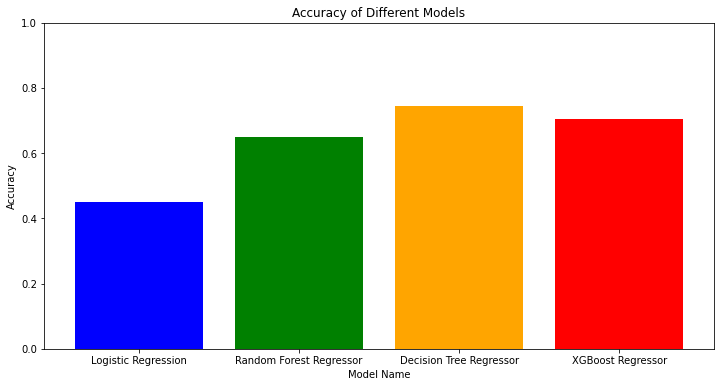

In [26]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Random Forest Regressor', 'Decision Tree Regressor', 'XGBoost Regressor']

# Accuracy scores
accuracy_scores = [lr_accuracy, rf_accuracy, dt_accuracy, xgb_accuracy]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Accuracy of Different Models')
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to ensure proper visualization
plt.show()

In [27]:
df1.head(10)

,Store Name,Store Pincode,Brand Name,Insulin Name,Insulin Type,Dosage Strength,Price (INR),Quantity available
0,NEW GALAXY MEDICAL AND GENERAL STORE,400104,Human Actrapid,Soluble Insulin Injection I.P.,short-acting,40 IU/mL,157,2
1,NEW GALAXY MEDICAL AND GENERAL STORE,400104,LUPISULIN N,Insulin Injection Isophane IP,intermediate-acting,40 IU/mL,198,3
2,NEW GALAXY MEDICAL AND GENERAL STORE,400104,NovoRapid,Insulin aspart IP,fast-acting,100 IU/mL,600,1
3,NEW GALAXY MEDICAL AND GENERAL STORE,400104,NovoRapid,Insulin aspart IP,fast-acting,100 IU/mL,2000,1
4,NEW GALAXY MEDICAL AND GENERAL STORE,400104,Ryzodeg,Insulin Degludec Insulin Aspart,rapid-acting,100 IU/mL,1500,1
5,VINAYAK MEDICAL & GENERAL STORES,400104,Fiasp,Fiasp Insulin Aspart Injection,fast-acting,100 IU/mL,1800,2
6,VINAYAK MEDICAL & GENERAL STORES,400104,Basalog Refil,Insulin Glargine Injection,fast-acting,100 IU/mL,480,1
7,VINAYAK MEDICAL & GENERAL STORES,400104,APIDRA,Apidra Insulin Glulisine,fast-acting,100 IU/mL,1200,3
8,ASHISH MEDICAL & GENERAL STORES,400104,Wosulin,Biphasic Isophane Insulin Injection IP,intermediate-acting,40 IU/mL,175,3
9,ASHISH MEDICAL & GENERAL STORES,400104,Wosulin,Biphasic Isophane Insulin Injection IP,intermediate-acting,100 IU/mL,250,2


In [29]:
from sklearn.linear_model import LogisticRegression
import pickle

# Assuming X_train and y_train are your training data
# Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Save the trained model to a file
with open('log_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)